In [41]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
from scipy.interpolate import interp1d

In [4]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/TNG/tables/Arepo_GFM_Tables_TNG/Yields/'

In [11]:
SNII = h5.File(basepath + 'SNII.hdf5', mode='r')
SNIa = h5.File(basepath + 'SNIa.hdf5', mode='r')
AGB = h5.File(basepath + 'AGB.hdf5', mode='r')
LT = h5.File(basepath + 'Lifetimes.hdf5', mode='r')

In [19]:
print(LT['Metallicities'][:])
print(AGB['Metallicities'][:])
print(SNII['Metallicities'][:])

[4.e-04 4.e-03 8.e-03 2.e-02 5.e-02 1.e+00]
[1.e-04 4.e-03 8.e-03 2.e-02]
[0.    0.001 0.004 0.02 ]


In [55]:
geriatric_mass_interp = interp1d(LT['Lifetimes'][1], LT['Masses'][:],
                                bounds_error=False, fill_value=-1)

In [57]:
SNII_Fe = SNII['Yields']['Z_0.004']['Yield'][10]
SNII_Mg = SNII['Yields']['Z_0.004']['Yield'][6]

SNII_Fe_interp = interp1d(SNII['Masses'][:], SNII_Fe, bounds_error=False, fill_value=0)
SNII_Mg_interp = interp1d(SNII['Masses'][:], SNII_Mg, bounds_error=False, fill_value=0)

In [79]:
AGB_Fe = AGB['Yields']['Z_0.004']['Yield'][10]
AGB_Mg = AGB['Yields']['Z_0.004']['Yield'][6]

AGB_Fe_interp = interp1d(AGB['Masses'][:], AGB_Fe, bounds_error=False, fill_value=0)
AGB_Mg_interp = interp1d(AGB['Masses'][:], AGB_Mg, bounds_error=False, fill_value=0)

In [82]:
Tlist = np.linspace(0, 10, 1000) * 1e9
Mger = geriatric_mass_interp(Tlist)
Feyield_SNII = SNII_Fe_interp(Mger)
Mgyield_SNII = SNII_Mg_interp(Mger)
Feyield_AGB = AGB_Fe_interp(Mger)
Mgyield_AGB = AGB_Mg_interp(Mger)

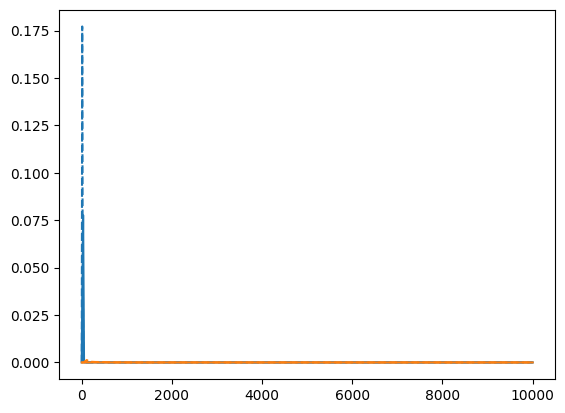

In [83]:
l = plt.plot(Tlist/1e6, Feyield_SNII)
plt.plot(Tlist/1e6, Mgyield_SNII, c=l[0].get_color(), ls='dashed')
l = plt.plot(Tlist/1e6, Feyield_AGB)
plt.plot(Tlist/1e6, Mgyield_AGB, c=l[0].get_color(), ls='dashed')

/tmp/ipykernel_2552467/3786316362.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(Tlist/1e6, np.log10(Mgyield_SNII/Feyield_SNII))


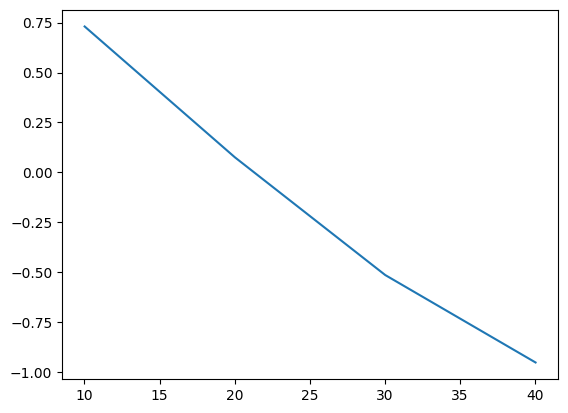

In [87]:
plt.plot(Tlist/1e6, np.log10(Mgyield_SNII/Feyield_SNII))
# plt.plot(Tlist/1e6, np.log10(Mgyield_AGB/Feyield_AGB))